In [ ]:
from tensorflow.keras.datasets import cifar10 # Загружаем датасет cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization # Базовые слои для счёрточных сетей
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы для learning_rate
from tensorflow.keras import utils # Используем для One Hot Encoding
from tensorflow.keras.preprocessing import image # Для отрисовки изображений
import numpy as np # Библиотека работы с массивами

import matplotlib.pyplot as plt # Для отрисовки графиков
from PIL import Image # Для работы с изображениями
import random # Для генерации случайных чисел 
import math # Для округления
import os # Для работы с функциями операционной системы

%matplotlib inline

In [ ]:
# Загружаем базу изображений с правильными ответами Cifar10
(x_train, y_train_original), (x_test, y_test_original) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
# Выводим размерности обучающей и тестовой выборки
print("Обучающая выборка:")
print(x_train.shape)
print()
# 3 - RGB - цветовая модель
print("Тестовая выборка:")
print(x_test.shape)
print()
print()

print("Правильные ответы в обучающей выборке:")
print(y_train_original.shape)

Обучающая выборка:
(50000, 32, 32, 3)

Тестовая выборка:
(10000, 32, 32, 3)


Правильные ответы в обучающей выборке:
(50000, 1)


In [ ]:
# Установка названия классов изображений
labels = ['Самолет', 'Автомобиль', 'Птица', 'Кот', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

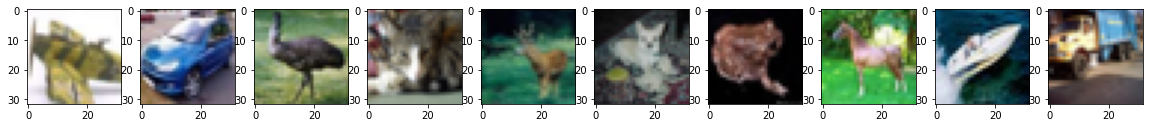

Правильные ответы: 0(Самолет); 1(Автомобиль); 2(Птица); 3(Кот); 4(Олень); 5(Собака); 6(Лягушка); 7(Лошадь); 8(Корабль); 9(Грузовик); 


In [ ]:
# Выводим для примера картинки и их классы

fig, axs = plt.subplots(1, 10, figsize=(20, 3)) # Создаем полотно из 10 графиков
y = ''
for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train_original==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  label = y_train_original[index][0]
  y += str(label) + "("+labels[label]+"); " # Созраняем лэйблы для каждой картинки
  axs[i].imshow(Image.fromarray(img)) # Отображаем изображение i-ым графиков

# Отображаем картинки и их классы
plt.show()
print("Правильные ответы:", y)

In [ ]:
# Превращаем y_train и y_test сетей в формат one hot encoding
y_train = utils.to_categorical(y_train_original, 10)
y_test = utils.to_categorical(y_test_original, 10)

print("Обучающая выборка:")
print(y_train_original[5], "->", y_train[5])
print(y_train_original[234], "->", y_train[234])
print(y_train_original[45477], "->", y_train[45477])
print(y_train_original[14848], "->", y_train[14848])
print()

print("Тестовая выборка:")
print(y_train_original[15], "->", y_train[15])
print(y_train_original[334], "->", y_train[334])
print(y_train_original[8477], "->", y_train[8477])
print(y_train_original[3768], "->", y_train[3768])

Обучающая выборка:
[1] -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[6] -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[5] -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0] -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Тестовая выборка:
[9] -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3] -> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[2] -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[7] -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# Разделяем тестовую выборку на проверочную и тестовую
x_val = x_test[0:8000]
y_val = y_test[0:8000]

x_test = x_test[8000:]
y_test = y_test[8000:]


In [ ]:
# Проверим еще раз размерности выборок

print("Обучающая выборка:")
print(x_train.shape)
print(y_train.shape)
print()

print("Проверочная выборка:")
print(x_val.shape)
print(y_val.shape)
print()

print("Тестовая выборка:")
print(x_test.shape)
print(y_test.shape)

Обучающая выборка:
(50000, 32, 32, 3)
(50000, 10)

Проверочная выборка:
(8000, 32, 32, 3)
(8000, 10)

Тестовая выборка:
(2000, 32, 32, 3)
(2000, 10)


Сверточная нейронная сеть

In [ ]:
# задаём batch_size
batch_size = 128 

# Создаем последовательную модель
model = Sequential()
# Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3), name="bn1"))
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name="Conv2D-layer1"))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name="Conv2D-layer2"))
# Первый слой уменьшения изображения в 2 раза
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer1"))
# Слой Dropout
model.add(Dropout(0.25, name="Dropout-layer1"))

# Слой пакетной нормализации
model.add(BatchNormalization(name = "bn2"))
# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name = "Conv2D-layer3"))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name = "Conv2D-layer4"))
# Второй слой уменьшения изображения в 2 раза
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer2"))
# Слой Dropout
model.add(Dropout(0.25, name="Dropout-layer2"))

# Слой пакетной нормализации
model.add(BatchNormalization(name = "bn3"))
# Пятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name = "Conv2D-layer5"))
# Шестой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name = "Conv2D-layer6"))
# Третий слой уменьшения изображения в 2 раза
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer3"))
# Слой регуляризации Dropout
model.add(Dropout(0.25, name="Dropout-layer3"))

# Слой преобразования данных из 2D представления в плоское
model.add(Flatten(name="flatten"))
# Выходной полносвязный классифицирующий слой
model.add(Dense(10, activation='softmax', name = "labels"))

# Компилируем сеть
#model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bn1 (BatchNormalization)    (None, 32, 32, 3)         12        
                                                                 
 Conv2D-layer1 (Conv2D)      (None, 32, 32, 32)        896       
                                                                 
 Conv2D-layer2 (Conv2D)      (None, 32, 32, 32)        9248      
                                                                 
 mp2D-layer1 (MaxPooling2D)  (None, 16, 16, 32)        0         
                                                                 
 Dropout-layer1 (Dropout)    (None, 16, 16, 32)        0         
                                                                 
 bn2 (BatchNormalization)    (None, 16, 16, 32)        128       
                                                                 
 Conv2D-layer3 (Conv2D)      (None, 16, 16, 64)        1

Epoch 1/20
391/391 [==============================] - 13s 11ms/step - loss: 1.3954 - accuracy: 0.4921 - val_loss: 1.5079 - val_accuracy: 0.5027
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9453 - accuracy: 0.6646 - val_loss: 0.8907 - val_accuracy: 0.6850
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 0.7991 - accuracy: 0.7162 - val_loss: 0.7367 - val_accuracy: 0.7487
Epoch 4/20
391/391 [==============================] - 4s 9ms/step - loss: 0.7107 - accuracy: 0.7511 - val_loss: 0.7160 - val_accuracy: 0.7598
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 0.6435 - accuracy: 0.7733 - val_loss: 0.6386 - val_accuracy: 0.7806
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 0.6004 - accuracy: 0.7877 - val_loss: 0.6102 - val_accuracy: 0.7911
Epoch 7/20
391/391 [==============================] - 4s 9ms/step - loss: 0.5522 - accuracy: 0.8069 - val_loss: 0.6008 - val_accuracy: 0.7966


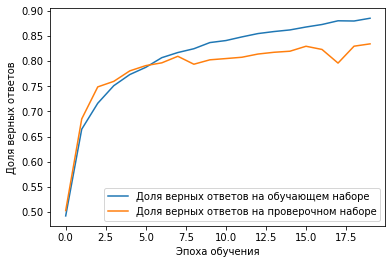

In [ ]:
# Обучаем сеть на данных Cifar10
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Работа модели в реальных условиях

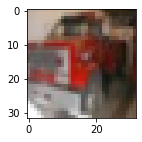

Выход сети:
[1.1200539e-03 6.6828921e-02 1.5069938e-03 2.8930046e-03 1.3854199e-03
 3.8409235e-03 5.0735381e-03 1.7119681e-04 4.9014525e-03 9.1227853e-01]

0 -> 0.0011200539302080869674682617187500000000
1 -> 0.0668289214372634887695312500000000000000
2 -> 0.0015069937799125909805297851562500000000
3 -> 0.0028930045664310455322265625000000000000
4 -> 0.0013854198623448610305786132812500000000
5 -> 0.0038409235421568155288696289062500000000
6 -> 0.0050735380500555038452148437500000000000
7 -> 0.0001711968070594593882560729980468750000
8 -> 0.0049014524556696414947509765625000000000
9 -> 0.9122785329818725585937500000000000000000

Распознан объект:  9 - Грузовик
Верный ответ:  9 - Грузовик


In [ ]:
# Подаем в нейросеть все картинки из тестовой выборки
prediction = model.predict(x_test)

# Выбираем номер для примера
n = 1122 # 1022 # 1137 # 1132 #1122

# Покажем картинку
img = x_test[n]
img = img.reshape(32, 32, 3)
img = img.astype('uint8')
plt.figure(figsize=(2, 2))
plt.imshow(Image.fromarray(img)) #Отображаем изображение i-ым графиков
plt.show()

print("Выход сети:")
print(prediction[n])
print()
for i in range(10):
  print(i,"->","{:.40f}".format(prediction[n][i]))
print()
print("Распознан объект: ", np.argmax(prediction[n]), "-", labels[np.argmax(prediction[n])])
print("Верный ответ: ", np.argmax(y_test[n]), "-", labels[np.argmax(y_test[n])])